In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('whitegrid')
# plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas.testing import assert_frame_equal

import yfinance as yf
# For time stamps
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
import yfinance as yf
from datetime import datetime

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

# Download Apple stock data only
AAPL = yf.download('AAPL', start, end)

# Add company name
AAPL['company_name'] = 'APPLE'

# Display the last 10 rows of the data
AAPL.tail(10)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-10-15,233.610001,237.490005,232.369995,233.850006,233.850006,64751400,APPLE
2024-10-16,231.600006,232.119995,229.839996,231.779999,231.779999,34082200,APPLE
2024-10-17,233.429993,233.850006,230.520004,232.149994,232.149994,32993800,APPLE
2024-10-18,236.179993,236.179993,234.009995,235.000000,235.000000,46431500,APPLE
2024-10-21,234.449997,236.850006,234.449997,236.479996,236.479996,36254500,APPLE
2024-10-22,233.889999,236.220001,232.600006,235.860001,235.860001,38846600,APPLE
2024-10-23,234.080002,235.139999,227.759995,230.759995,230.759995,52287000,APPLE
2024-10-24,229.979996,230.820007,228.410004,230.570007,230.570007,31109500,APPLE
2024-10-25,229.740005,233.220001,229.570007,231.410004,231.410004,38802300,APPLE


In [5]:
# Check the shape of the entire AAPL dataframe
print("AAPL DataFrame shape:", AAPL.shape)


AAPL DataFrame shape: (1258, 7)


In [6]:
AAPL.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
company_name     object
dtype: object

In [7]:
# Check the shape of the entire AAPL dataframe
print("AAPL DataFrame shape:", AAPL.shape)


AAPL DataFrame shape: (1258, 7)


In [8]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,147.986175,149.631828,146.445234,148.120342,146.446477,9.261849e+07
std,41.251512,41.476624,40.999927,41.250466,41.788313,5.294354e+07
min,57.020000,57.125000,53.152500,56.092499,54.569733,2.404830e+07
25%,125.344997,126.945000,124.070002,125.297499,123.051275,5.748452e+07
50%,149.480003,151.285004,147.964996,149.915001,147.803581,7.870440e+07
75%,175.202503,176.887497,173.570000,175.145004,173.795681,1.093357e+08
max,236.479996,237.490005,234.449997,236.479996,236.479996,4.265100e+08


In [9]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-10-29 to 2024-10-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Adj Close     1258 non-null   float64
 5   Volume        1258 non-null   int64  
 6   company_name  1258 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.6+ KB


In [10]:
AAPL.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

<Axes: ylabel='Date'>

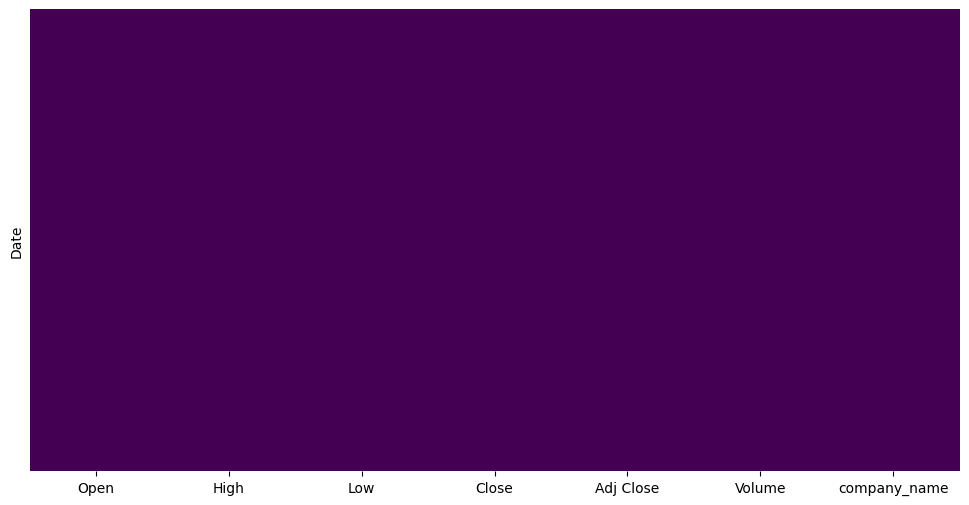

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(AAPL.isnull(), yticklabels=False, cbar=False, cmap='viridis')

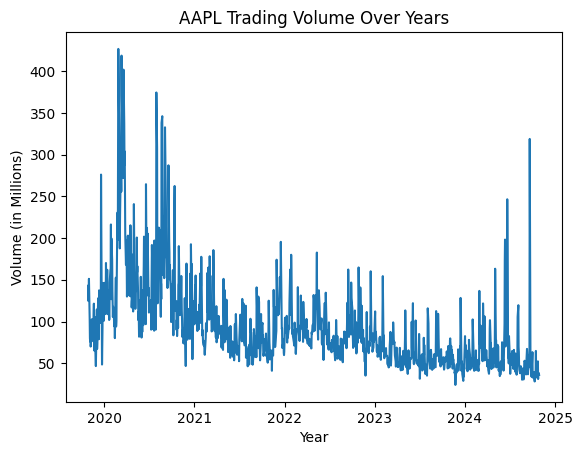

In [12]:
plt.plot(AAPL['Volume'] / 1e6)  # Convert volume to millions
plt.title('AAPL Trading Volume Over Years')
plt.ylabel('Volume (in Millions)')
plt.xlabel('Year')
plt.show()


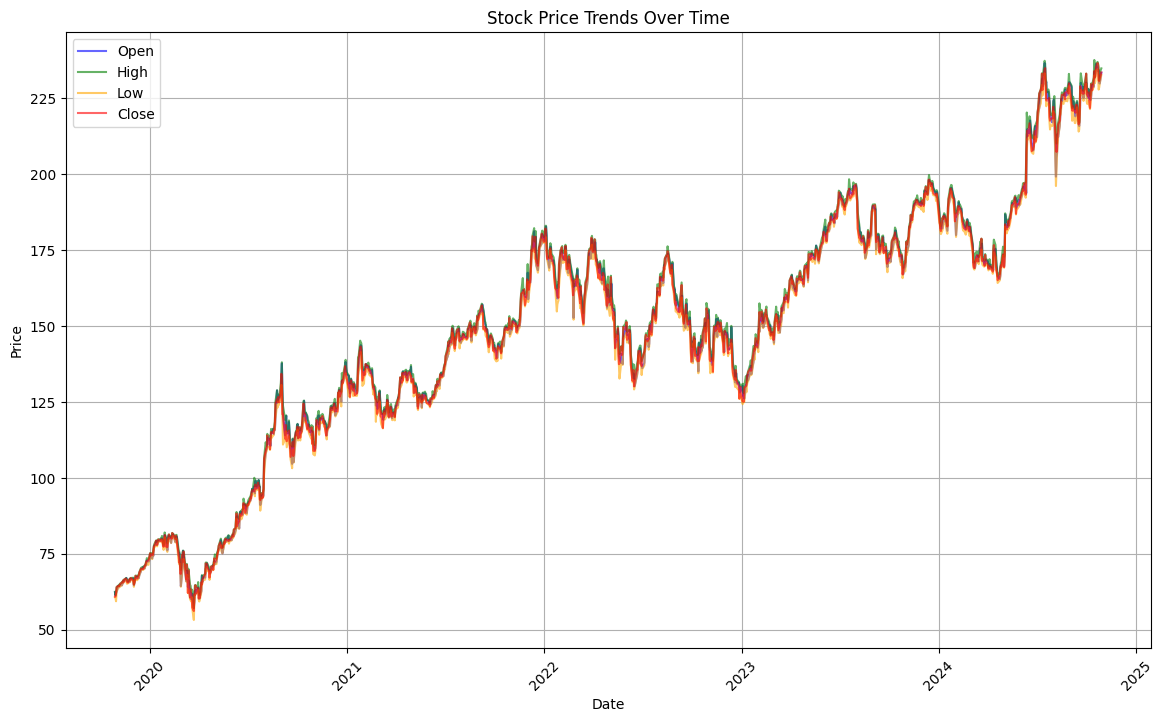

In [13]:
plt.figure(figsize=(14, 8))
plt.plot(AAPL.index, AAPL['Open'], label='Open', color='blue', alpha=0.6)
plt.plot(AAPL.index, AAPL['High'], label='High', color='green', alpha=0.6)
plt.plot(AAPL.index, AAPL['Low'], label='Low', color='orange', alpha=0.6)
plt.plot(AAPL.index, AAPL['Close'], label='Close', color='red', alpha=0.6)
plt.title('Stock Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


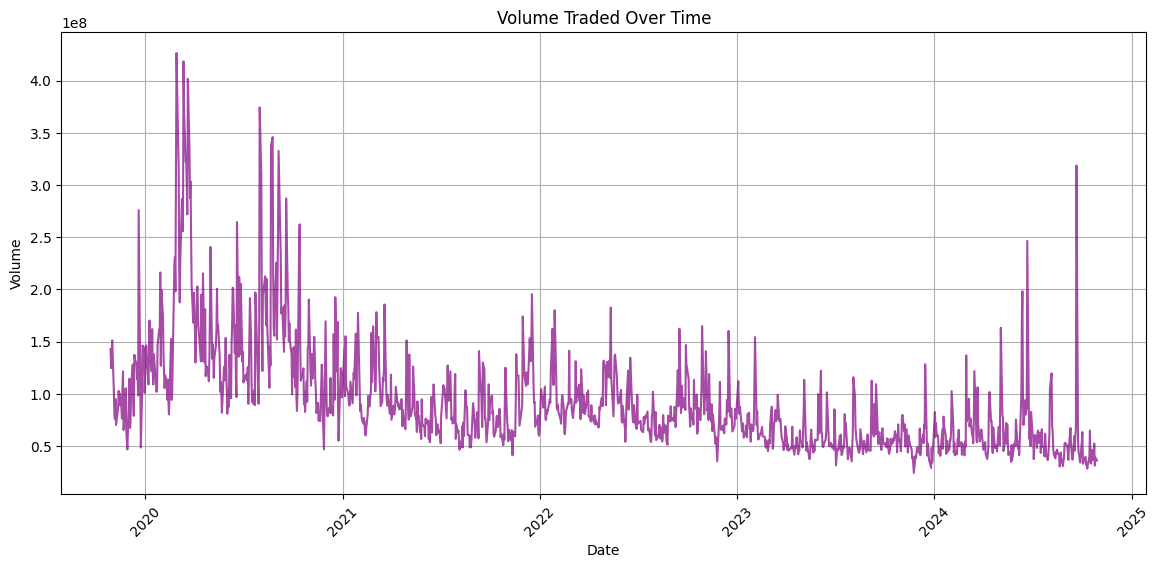

In [14]:
plt.figure(figsize=(14, 6))
plt.plot(AAPL.index, AAPL['Volume'], label='Volume', color='purple', alpha=0.7)
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


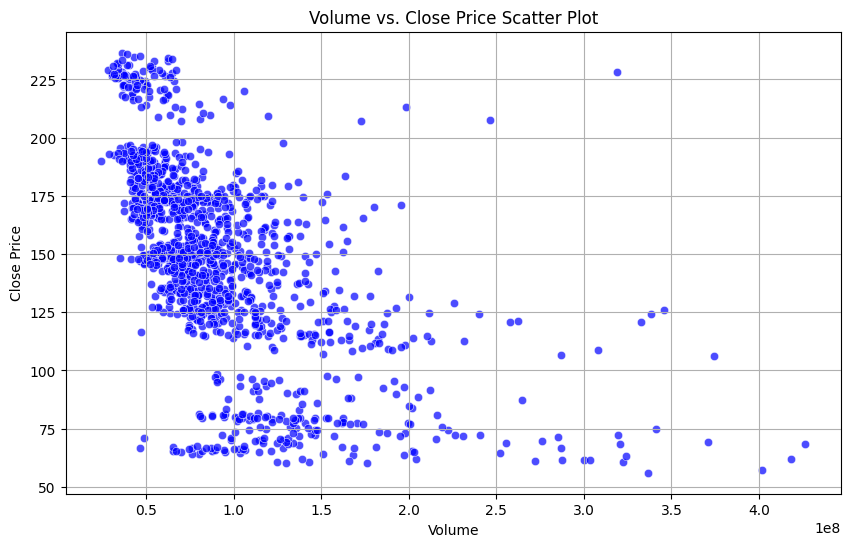

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=AAPL['Volume'], y=AAPL['Close'], color='blue', alpha=0.7)  # Set a single color for the scatter points
plt.title('Volume vs. Close Price Scatter Plot')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


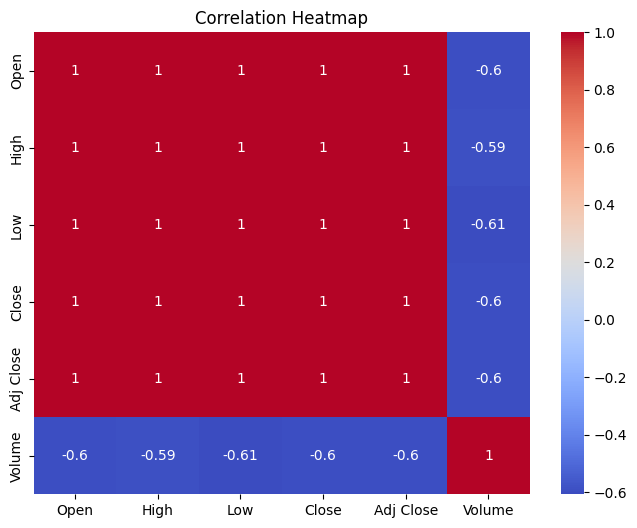

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(AAPL[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


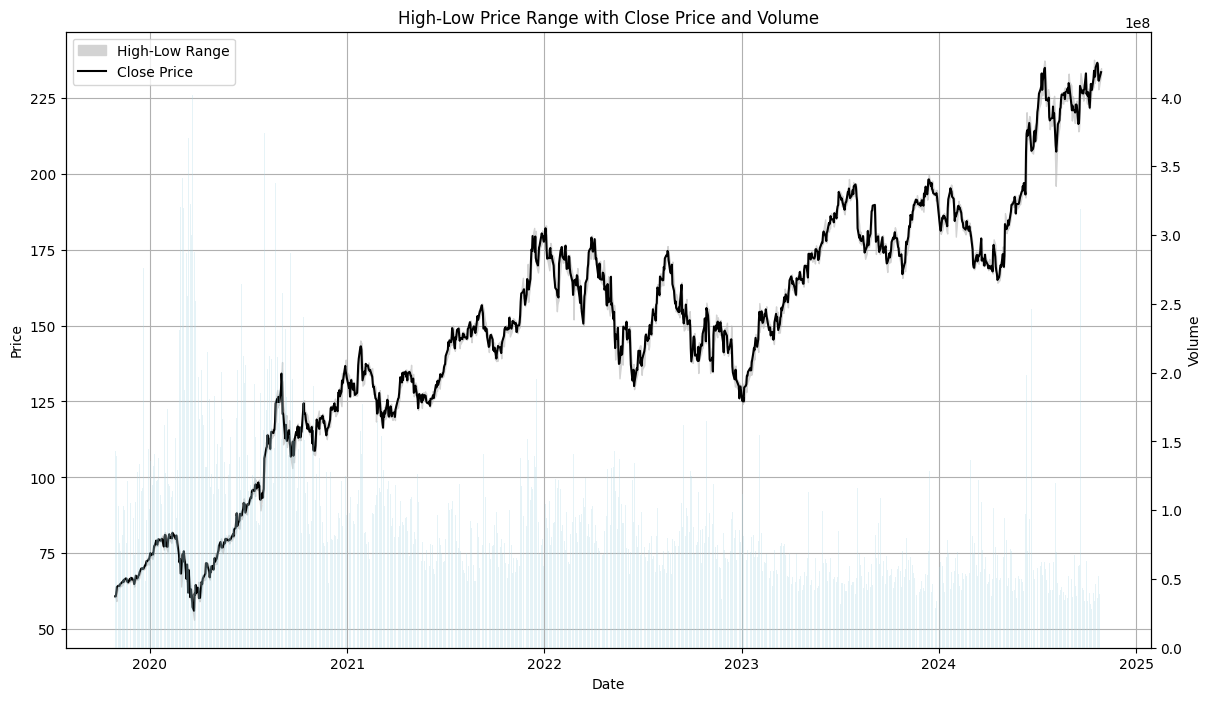

In [17]:
fig, ax = plt.subplots(figsize=(14, 8))

# High-Low range with Close price
ax.fill_between(AAPL.index, AAPL['Low'], AAPL['High'], color='lightgray', label='High-Low Range')
ax.plot(AAPL.index, AAPL['Close'], color='black', label='Close Price')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('High-Low Price Range with Close Price and Volume')
ax.legend(loc='upper left')
ax.grid(True)

# Volume bar chart
ax2 = ax.twinx()
ax2.bar(AAPL.index, AAPL['Volume'], color='lightblue', alpha=0.3, width=1)
ax2.set_ylabel('Volume')
plt.show()


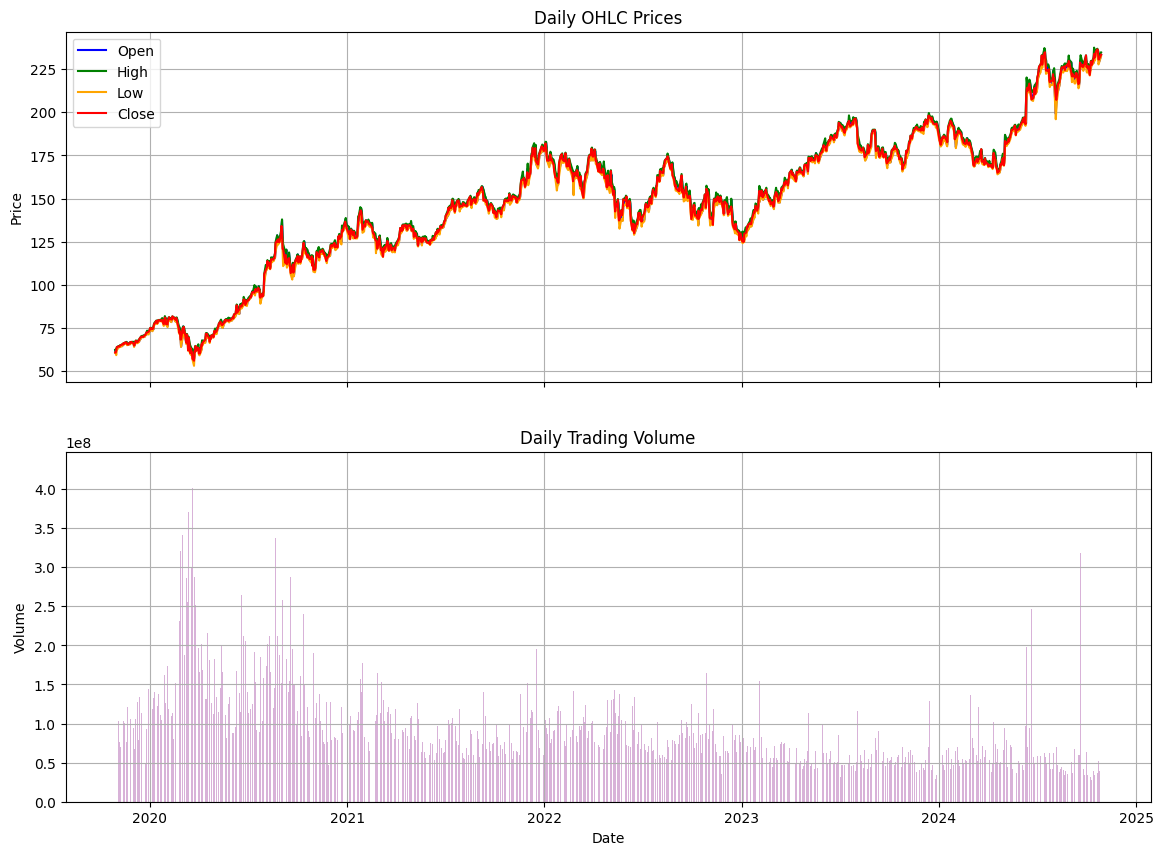

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# OHLC price ranges
ax1.plot(AAPL.index, AAPL['Open'], color='blue', label='Open')
ax1.plot(AAPL.index, AAPL['High'], color='green', label='High')
ax1.plot(AAPL.index, AAPL['Low'], color='orange', label='Low')
ax1.plot(AAPL.index, AAPL['Close'], color='red', label='Close')
ax1.set_ylabel('Price')
ax1.set_title('Daily OHLC Prices')
ax1.legend(loc='upper left')
ax1.grid(True)

# Volume
ax2.bar(AAPL.index, AAPL['Volume'], color='purple', alpha=0.3)
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.set_title('Daily Trading Volume')
ax2.grid(True)

plt.show()


In [19]:
AAPL.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name'], dtype='object')

In [20]:
AAPL.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [21]:
AAPL.shape

(1258, 7)

In [22]:
print(AAPL.head())


                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-10-29  62.242500  62.437500  60.642502  60.822498  58.854523  142839600   
2019-10-30  61.189999  61.325001  60.302502  60.814999  58.847267  124522000   
2019-10-31  61.810001  62.292500  59.314999  62.189999  60.177780  139162000   
2019-11-01  62.384998  63.982498  62.290001  63.955002  61.885670  151125200   
2019-11-04  64.332497  64.462502  63.845001  64.375000  62.292080  103272000   

           company_name  
Date                     
2019-10-29        APPLE  
2019-10-30        APPLE  
2019-10-31        APPLE  
2019-11-01        APPLE  
2019-11-04        APPLE  


In [23]:
# Reset index to access 'Date' as a column (if you want to keep it as an index, skip this step)
AAPL = AAPL.reset_index()

# Convert 'Date' to datetime if it's not already in datetime format
AAPL['Date'] = pd.to_datetime(AAPL['Date'])

# Extract 'Year', 'Month', and 'Day' from 'Date'
AAPL['Year'] = AAPL['Date'].dt.year
AAPL['Month'] = AAPL['Date'].dt.month
AAPL['Day'] = AAPL['Date'].dt.day

# Set 'Date' back as the index if needed
AAPL.set_index('Date', inplace=True)


In [24]:
# Use 'Year', 'Month', and 'Day' as features
X = AAPL[['Year', 'Month', 'Day']]

# 'Close' as the target variable
y = AAPL['Close']

# Check the shape of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1258, 3)
y shape: (1258,)


In [31]:
!pip uninstall prophet -y
!pip install prophet


Found existing installation: prophet 1.1.6
Uninstalling prophet-1.1.6:
  Successfully uninstalled prophet-1.1.6
  Using cached prophet-1.1.6-py3-none-win_amd64.whl.metadata (3.6 kB)
Using cached prophet-1.1.6-py3-none-win_amd64.whl (13.3 MB)


In [32]:
AAPL.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'Year', 'Month', 'Day'],
      dtype='object')

## model building

## prepare the data

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


14:39:25 - cmdstanpy - INFO - Chain [1] start processing
14:39:25 - cmdstanpy - INFO - Chain [1] done processing


Performance Metrics for All Models:
                       Model           MSE         MAE      MAPE        R2
0          Linear Regression      1.300491    0.884856  0.006475  0.999206
1              Decision Tree      3.427974    1.324471  0.009251  0.997907
2              Random Forest      2.311747    1.103109  0.007912  0.998588
3  Support Vector Regression     56.388366    3.730400  0.031609  0.965565
4          Gradient Boosting      2.624389    1.217838  0.008842  0.998397
5           Ridge Regression      2.159234    1.154170  0.008448  0.998681
6                       LSTM  13774.627177  111.575665  0.755915 -7.411743
7                    Prophet    315.985150   13.119160  0.071383  0.313008


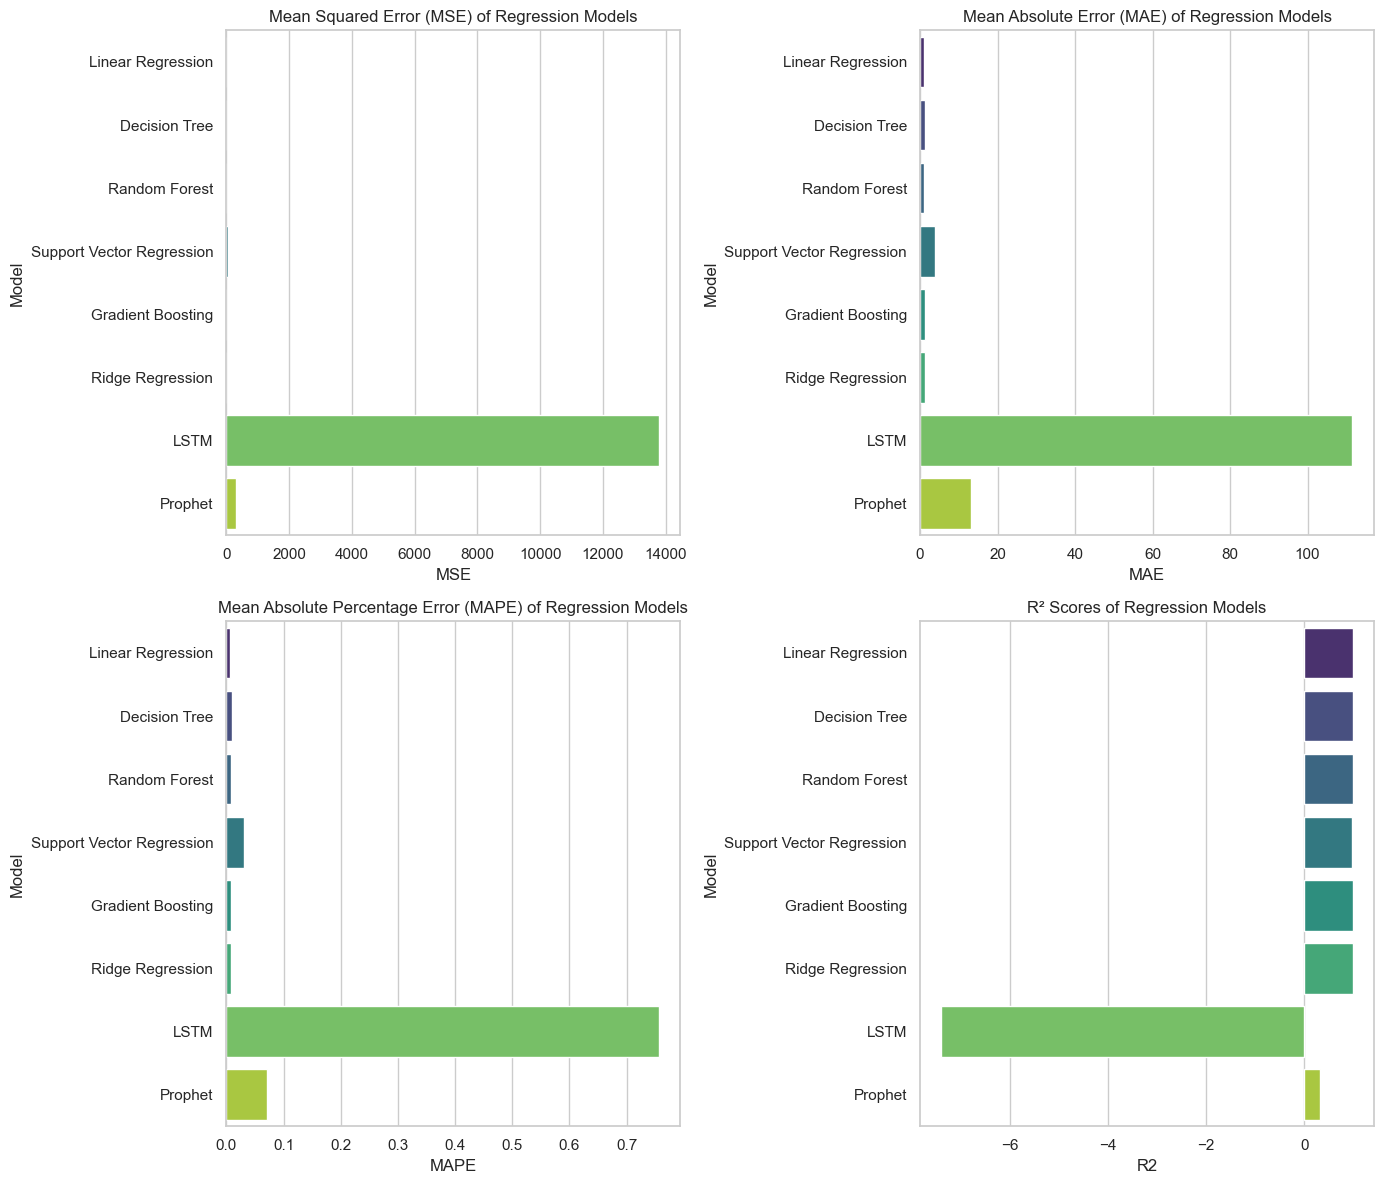

In [37]:
import pandas as pd
from prophet import Prophet
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming AAPL DataFrame is already defined
# Create the 'ds' column by combining Year, Month, and Day into a DateTime format
AAPL['ds'] = pd.to_datetime(AAPL[['Year', 'Month', 'Day']])

# Set 'y' to the column you want to forecast, e.g., 'Close' or 'Adj Close'
AAPL['y'] = AAPL['Adj Close']  # or AAPL['Close']

# Split the data into features (X) and target (y)
X = AAPL[['Open', 'High', 'Low', 'Volume']]  # Features to predict
y = AAPL['y']  # Target variable

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Ridge Regression": Ridge(alpha=1.0)
}

# Dictionary to store model performance metrics
model_performance = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Scale data for Ridge, SVR models that may benefit from scaling
    if model_name in ["Support Vector Regression", "Ridge Regression"]:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the performance in the dictionary
    model_performance[model_name] = {
        "MSE": mse, 
        "MAE": mae, 
        "MAPE": mape,
        "R2": r2
    }

# Add LSTM Model
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, time steps, features]
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Initialize and train LSTM model
lstm_model = Sequential([
    LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=16, verbose=0)

# Make predictions with LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# Calculate performance metrics for LSTM
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

model_performance["LSTM"] = {
    "MSE": mse_lstm,
    "MAE": mae_lstm,
    "MAPE": mape_lstm,
    "R2": r2_lstm
}

# Add Prophet Model
# Prepare the data for Prophet
AAPL_prophet = AAPL[['ds', 'y']]
train_prophet = AAPL_prophet[:int(0.8 * len(AAPL_prophet))]
test_prophet = AAPL_prophet[int(0.8 * len(AAPL_prophet)):]

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Make future predictions with Prophet
future = prophet_model.make_future_dataframe(periods=len(test_prophet))
forecast = prophet_model.predict(future)

# Filter predictions for the test period
y_pred_prophet = forecast['yhat'].iloc[-len(test_prophet):].values

# Calculate performance metrics for Prophet
mse_prophet = mean_squared_error(test_prophet['y'], y_pred_prophet)
mae_prophet = mean_absolute_error(test_prophet['y'], y_pred_prophet)
mape_prophet = mean_absolute_percentage_error(test_prophet['y'], y_pred_prophet)
r2_prophet = r2_score(test_prophet['y'], y_pred_prophet)

model_performance["Prophet"] = {
    "MSE": mse_prophet,
    "MAE": mae_prophet,
    "MAPE": mape_prophet,
    "R2": r2_prophet
}

# Convert performance metrics to DataFrame for easier display and plotting
performance_df = pd.DataFrame(model_performance).T.reset_index()
performance_df.columns = ['Model', 'MSE', 'MAE', 'MAPE', 'R2']

# Display performance metrics
print("Performance Metrics for All Models:")
print(performance_df)

# Set the style for the plots
sns.set(style="whitegrid")

# Visualization: MSE, MAE, MAPE, R² in a single figure
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot MSE
sns.barplot(x='MSE', y='Model', data=performance_df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Mean Squared Error (MSE) of Regression Models')

# Plot MAE
sns.barplot(x='MAE', y='Model', data=performance_df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Mean Absolute Error (MAE) of Regression Models')

# Plot MAPE
sns.barplot(x='MAPE', y='Model', data=performance_df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Mean Absolute Percentage Error (MAPE) of Regression Models')

# Plot R²
sns.barplot(x='R2', y='Model', data=performance_df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('R² Scores of Regression Models')

# Adjust layout
plt.tight_layout()
plt.show()


In [44]:
AAPL.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'Year', 'Month', 'Day', 'ds', 'y'],
      dtype='object')

In [45]:
# Define feature matrix X and target variable y
X = AAPL[['Open', 'High', 'Low', 'Year', 'Month', 'Day']]
y = AAPL['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R²: {r2}")

# Predict the next 10 days' closing prices
# Create future dates based on the last available Year, Month, Day in your dataset
last_year = AAPL['Year'].max()
last_month = AAPL['Month'].max()
last_day = AAPL['Day'].max()

# Generate future dates (next 10 days)
future_dates = []
for i in range(1, 11):
    future_date = pd.Timestamp(year=last_year, month=last_month, day=last_day) + pd.Timedelta(days=i)
    future_dates.append(future_date)

# Prepare features for the next 10 days
future_data = pd.DataFrame({
    'Year': [date.year for date in future_dates],
    'Month': [date.month for date in future_dates],
    'Day': [date.day for date in future_dates],
    'Open': AAPL['Open'].iloc[-10:].mean(),  # Assuming average Open price
    'High': AAPL['High'].iloc[-10:].mean(),  # Assuming average High price
    'Low': AAPL['Low'].iloc[-10:].mean()     # Assuming average Low price
})

# Reorder columns to match the training features
future_data = future_data[['Open', 'High', 'Low', 'Year', 'Month', 'Day']]

# Predict the closing prices for the next 10 days
future_predictions = linear_model.predict(future_data)

# Display the predictions with dates
future_closing_prices = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': future_predictions
})

print("\nPredicted Closing Prices for the Next 10 Days:")
print(future_closing_prices)


Linear Regression Performance:
MSE: 0.9081433727181969
MAE: 0.7135693291734981
MAPE: 0.005012898733151715
R²: 0.9994308154041103

Predicted Closing Prices for the Next 10 Days:
        Date  Predicted_Close
0 2025-01-01       232.946374
1 2025-01-02       232.940913
2 2025-01-03       232.935453
3 2025-01-04       232.929992
4 2025-01-05       232.924531
5 2025-01-06       232.919071
6 2025-01-07       232.913610
7 2025-01-08       232.908149
8 2025-01-09       232.902689
9 2025-01-10       232.897228


In [46]:
import pickle

# Save the Linear Regression model
model_filename = 'linear_regression_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(linear_model, file)

# Save the feature data (optional)
features_filename = 'features.pkl'
with open(features_filename, 'wb') as file:
    pickle.dump(X.columns.tolist(), file)

print(f"Model saved as {model_filename} and features saved as {features_filename}.")


Model saved as linear_regression_model.pkl and features saved as features.pkl.


In [47]:
AAPL.to_csv('apple_stock_data.csv', index=False)
